**Code Author: Thaihang Chung**

In [1]:
import math
from pylab import *
import matplotlib.pyplot as plt
from matplotlib import colors
import random
import numpy as np
from sklearn.linear_model import LinearRegression

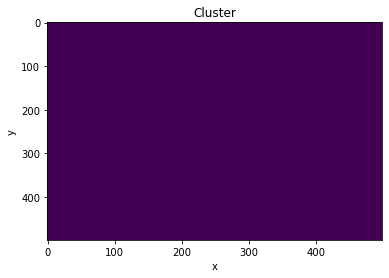

In [14]:
L = 500
runs = 1000
bounce = 0.5 #this seems to only run if random walk cell code twice 
x_grid = L
y_grid = L
grid = zeros((L-1,L-1))
#creating grid
def plotfigure(grid):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title("Cluster")
    plt.xlabel("x")
    plt.ylabel("y")
    ax.imshow(grid, aspect='auto', interpolation='nearest')
plotfigure(grid)

248
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


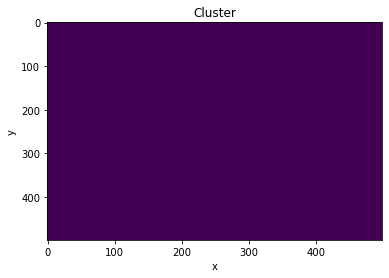

In [15]:
grid = zeros((L-1,L-1))
#image = Image.new("L", (x_grid, y_grid))

# checker array
s_x = [-1, -1, 0, 1, 1, 1, 0, -1]
s_y = [0, 1, 1, 1, 0, -1, -1, -1]

x_anchor = (x_grid - 1) // 2
y_anchor = (y_grid - 1) // 2
rmax = min(x_anchor, y_anchor) - 1
grid[x_anchor,y_anchor]=1

print(rmax)
#boolean table
print(grid)

plotfigure(grid)

0 %
1 %
1 %
1 %
2 %
2 %
2 %
2 %
2 %
2 %
3 %
3 %
3 %
3 %
4 %
4 %
4 %
5 %
5 %
5 %
6 %
6 %
6 %
6 %
6 %
7 %
7 %
7 %
7 %
8 %
8 %
8 %
8 %
8 %
9 %
9 %
9 %
9 %
9 %
9 %
10 %
10 %
10 %
10 %
10 %
11 %
11 %
11 %
11 %
12 %
12 %
13 %
13 %
13 %
13 %
14 %
14 %
14 %
14 %
15 %
15 %
15 %
15 %
16 %
16 %
16 %
16 %
16 %
17 %
17 %
17 %
17 %
17 %
17 %
17 %
18 %
18 %
18 %
18 %
19 %
19 %
19 %
20 %
20 %
20 %
20 %
20 %
21 %
21 %
21 %
21 %
21 %
21 %
22 %
22 %
22 %
23 %
23 %
23 %
24 %
24 %
24 %
24 %
25 %
25 %
25 %
25 %
25 %
25 %
25 %
26 %
26 %
26 %
26 %
26 %
26 %
27 %
27 %
27 %
27 %
27 %
27 %
28 %
28 %
28 %
28 %
28 %
28 %
29 %
29 %
29 %
30 %
30 %
30 %
31 %
32 %
32 %
32 %
32 %
32 %
33 %
33 %
34 %
34 %
34 %
34 %
34 %
35 %
35 %
35 %
35 %
35 %
35 %
36 %
36 %
36 %
36 %
37 %
37 %
38 %
38 %
38 %
38 %
39 %
39 %
39 %
40 %
40 %
40 %
40 %
40 %
40 %
40 %
41 %
41 %
41 %
41 %
42 %
42 %
42 %
42 %
42 %
43 %
43 %
43 %
43 %
43 %
43 %
44 %
44 %
45 %
45 %
45 %
46 %
46 %
46 %
47 %
47 %
47 %
48 %
48 %
48 %
49 %
49 %
49 %
50 %
50 %
50 %


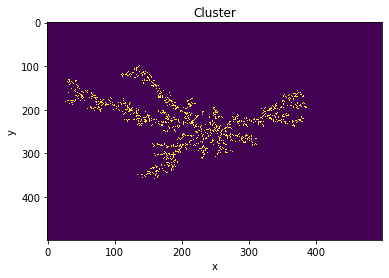

In [16]:
r_i = 2
N = 0 #initializing number of particles in cluster
t = 0 #Initializing time steps

Narray = [] #array for number of particles in cluster
tarray = [] #array for time step
Darray = [] #array for Dimension
rarray = [] #array for Radius
xwalk = []
ywalk = []
while r_i < rmax:
    
    a = random.random() * math.pi * 2.0
    x = int(x_anchor + r_i * math.cos(a))
    y = int(y_anchor + r_i * math.sin(a))
    # random walk
    clustered = False
    for i in range(runs):
        t+=1
        a = random.randint(0, 7)
        x = x + s_x[a]
        y = y + s_y[a]
        
        if x < 0 or x > 2*rmax or y < 0 or y > 2*rmax:
            break
        if grid[x][y] == 0:
            # check the neighbors
            for j in range(8):
                x_cont = int(x + s_x[j])
                y_cont = int(y + s_y[j])
                
                if grid[x_cont][y_cont] > 0:
                    N+=1
                    Narray.append(N)
                    tarray.append(t)
                    if random.random() >= bounce: #cell needs to run twice!
                        grid[x][y] = 1
                    else:
                        grid[x][y] = 0
                    
                    r = math.sqrt((x - x_anchor) ** 2.0 + (y - y_anchor) ** 2.0)
                    rarray.append(r)
                    if r > r_i:
                        r_i = r
                        print (str(int(100 * r_i / rmax)),"%")
                    clustered = True
                    break
        if clustered == True:
            break

print("Number of particles in cluster:",N)
print("Radius of the cluster:", rmax)
plotfigure(grid)

figfile = 'L'+str(L)+'N'+str(runs)+'.png'
print(figfile)
plt.savefig(figfile)

In [18]:
#Attempt at linear regression in python
def linreg(g,h):
    x = g.reshape((-1,1))
    y = h
    #print(x)
    #print(y)
    model = LinearRegression().fit(x, y)
    print('intercept:', model.intercept_)
    print('slope:', model.coef_)
    
    new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
    Dfit = new_model.coef_
    print('intercept:', new_model.intercept_)
    print('slope:', new_model.coef_)
    y_pred = model.predict(x)
    y_pred = model.intercept_ + model.coef_ * x
    x_new = g.reshape((-1, 1))
    y_new = model.predict(x_new)
    plt.plot(x_new,y_new,'r')
    plt.text(1, 1, 'D='+str(Dfit) , fontsize=15)
    

In [19]:
print("Number of particles in cluster:",len(Narray))
print("Radius of the cluster:", r_i)
print("Number of radii recorded:", len(rarray))

#print("Time elapsed: ", tarray)
tsum = []
newt = 0
for i in range(len(tarray)):
    newt += tarray[i]
    tsum.append(newt)
#print(tsum)
D_cluster = np.log(N)/np.log(r)
print("This is the cluster dimension: ", D_cluster)

N_D = np.log(Narray)
R_D = np.log(rarray)

#print(Narray, "This is N array")
#print("This is N_D", N_D)
#print("This is R_D", R_D)
D = np.divide(N_D,R_D)
#print(D)

Number of particles in cluster: 8440
Radius of the cluster: 248.3646512690564
Number of radii recorded: 8440
This is the cluster dimension:  1.6393299624831486


<ipython-input-19-ac3a3fa1fc8f>:21: RuntimeWarning: divide by zero encountered in true_divide
  D = np.divide(N_D,R_D)


\begin{equation}
    D = \frac{\log(N)}{\log(R)}
\end{equation}

\begin{equation}
    \log(N) = D\log(R)
\end{equation}

intercept: 2.70836948488009
slope: [1.23323073]
intercept: [2.70836948]
slope: [[1.23323073]]


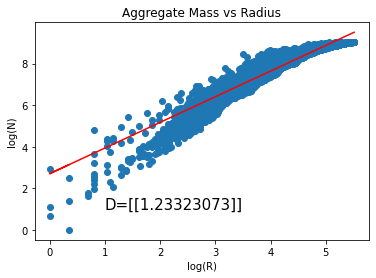

In [20]:
plt.title("Aggregate Mass vs Radius")
plt.xlabel("log(R)")
plt.ylabel("log(N)")
newR_D = R_D[50:]
newN_D = N_D[50:]
linreg(R_D,N_D)
plt.scatter(R_D,N_D)

8440
8440


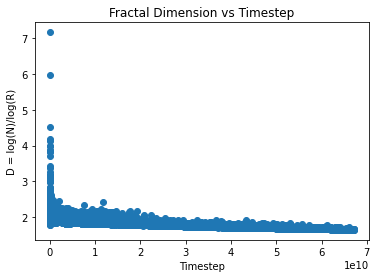

In [21]:
print(len(D))
print(len(tsum))
stamp = [rmax / i for i in rarray]
newD = D[3:]
newtsum = tsum[3:]
plt.title("Fractal Dimension vs Timestep")
plt.xlabel("Timestep")
plt.ylabel("D = log(N)/log(R)")
plt.scatter(newtsum,newD)

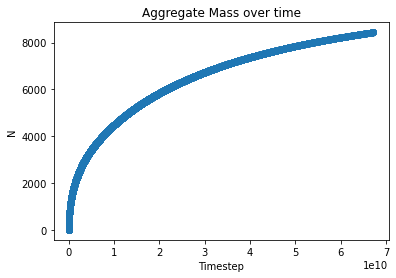

In [22]:
#print(len(tarray))
#print(len(Narray))
plt.title("Aggregate Mass over time")
plt.xlabel("Timestep")
plt.ylabel("N")
#fit(tsum,Narray)
plt.scatter(tsum,Narray)

In [23]:
#print(len(Darray))
#print(len(tarray))

#plt.plot(tarray,Darray)

In [24]:
#print(rarray)

stamp = [rmax / i for i in rarray]

#print(stamp)

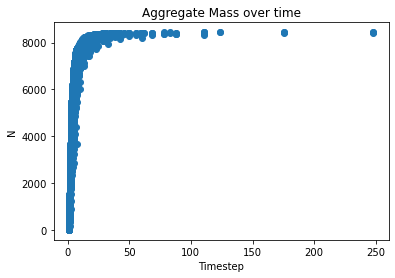

In [25]:
#print(len(tarray))
#print(len(Narray))
stamp.reverse()
#Narray.reverse()
plt.title("Aggregate Mass over time")
plt.xlabel("Timestep")
plt.ylabel("N")
plt.scatter(stamp,Narray)